In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Import data

In [131]:
df = pd.read_csv('dataset/DigiDB_digimonlist.csv', index_col=0)

## EDA

In [132]:
df.shape

(249, 12)

In [133]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 1 to 249
Columns: 12 entries, Digimon to Lv50 Spd
dtypes: int64(8), object(4)
memory usage: 25.3+ KB


In [134]:
df.isnull().sum()

Digimon        0
Stage          0
Type           0
Attribute      0
Memory         0
Equip Slots    0
Lv 50 HP       0
Lv50 SP        0
Lv50 Atk       0
Lv50 Def       0
Lv50 Int       0
Lv50 Spd       0
dtype: int64

In [135]:
df.columns

Index(['Digimon', 'Stage', 'Type', 'Attribute', 'Memory', 'Equip Slots',
       'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def', 'Lv50 Int', 'Lv50 Spd'],
      dtype='object')

In [136]:
df.sample(5)

,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Number,,,,,,,,,,,,
28,Kudamon,Rookie,Vaccine,Light,5,1,590,128,53,74,117,105
222,MetalEtemon,Mega,Virus,Earth,18,3,1630,128,134,188,89,124
102,Vegiemon,Champion,Virus,Plant,6,2,1380,79,113,106,87,88
81,Cyclonemon,Champion,Virus,Earth,6,2,940,84,131,128,93,81
107,Reppamon,Champion,Vaccine,Light,8,1,790,118,94,99,99,143


In [137]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Digimon,249,249,Kuramon,1
Stage,249,8,Mega,74
Type,249,4,Virus,82
Attribute,249,9,Dark,37


In [138]:
df.select_dtypes(exclude=['object']).describe().T

,count,mean,std,min,25%,50%,75%,max
Memory,249.0,11.987952,6.616501,2.0,6.0,12.0,18.0,25.0
Equip Slots,249.0,1.574297,0.854012,0.0,1.0,1.0,2.0,3.0
Lv 50 HP,249.0,1210.883534,326.102384,530.0,990.0,1180.0,1480.0,2080.0
Lv50 SP,249.0,109.779116,32.454115,50.0,84.0,104.0,132.0,203.0
Lv50 Atk,249.0,124.518072,45.639372,52.0,89.0,119.0,153.0,318.0
Lv50 Def,249.0,116.377510,32.132696,59.0,93.0,113.0,138.0,213.0
Lv50 Int,249.0,112.638554,41.562888,50.0,79.0,104.0,138.0,233.0
Lv50 Spd,249.0,120.401606,32.633339,61.0,92.0,119.0,143.0,218.0


In [139]:
TARGET = 'Type'

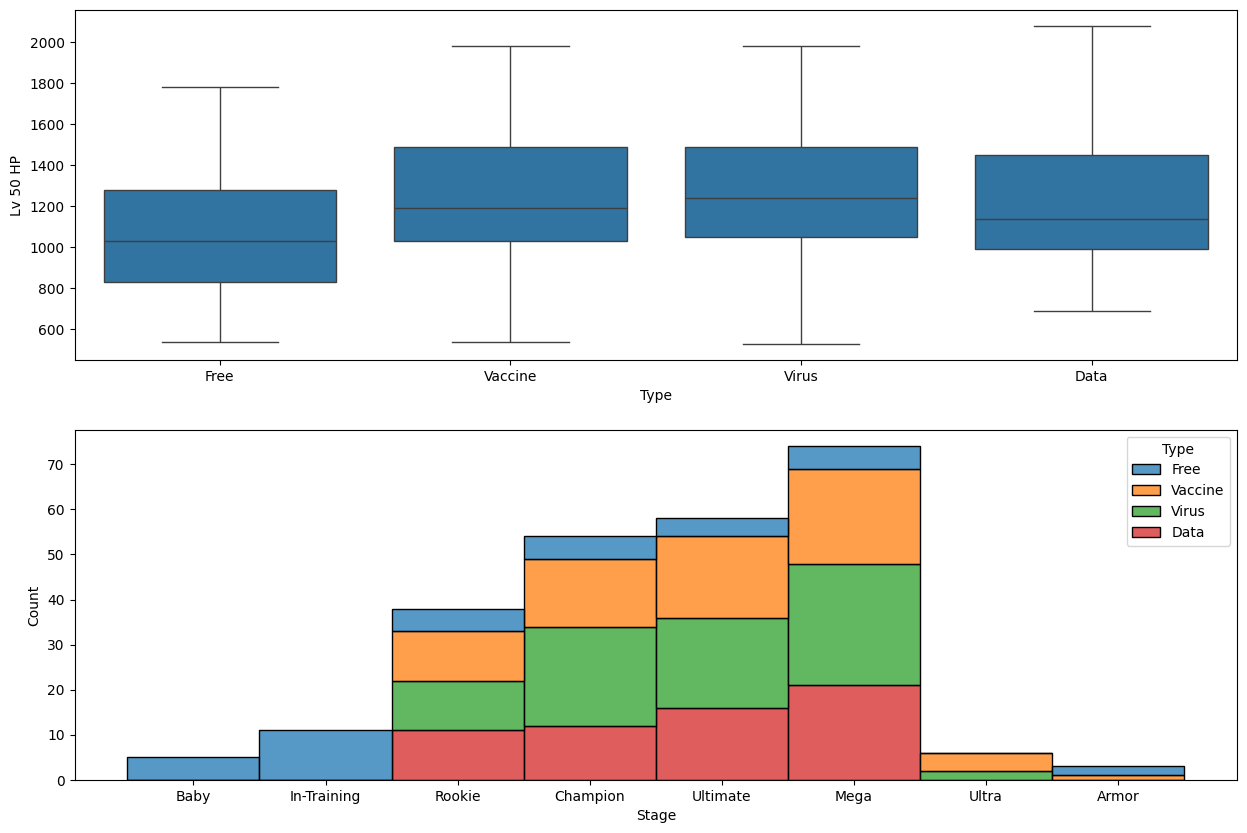

In [140]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.boxplot(data=df, x=TARGET, y='Lv 50 HP')
ax2 = plt.subplot(2,1,2)
ax2 = sns.histplot(data=df, x='Stage', hue=TARGET, multiple='stack')
plt.show()

In [141]:
df.select_dtypes(include=['object']).columns

Index(['Digimon', 'Stage', 'Type', 'Attribute'], dtype='object')

In [142]:
def graficar_categoricas(df, lista_categoricas, TARGET):
    plt.figure(figsize=(10,10))
    for n in range(len(lista_categoricas)):
        axs = plt.subplot(2,1,n+1)
        axs = sns.histplot(data=df, x=lista_categoricas[n], hue=TARGET, multiple='stack')
    plt.show()

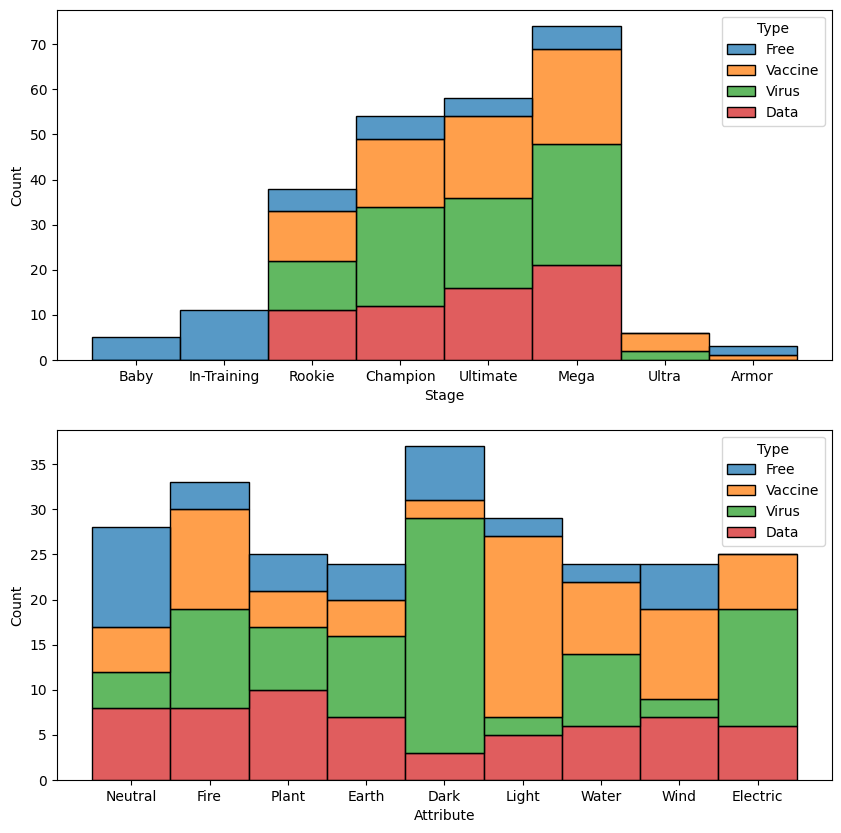

In [143]:
graficar_categoricas(df, ['Stage', 'Attribute'], TARGET)

In [144]:
df.select_dtypes(exclude=['object']).columns.tolist()[1]

'Equip Slots'

In [145]:
def graficar_numericas(df, lista_numericas, TARGET):
    plt.figure(figsize=(20,15))
    for n in range(len(lista_numericas)):
        axs = plt.subplot(4,2,n+1)
        axs = sns.boxplot(data=df, x=TARGET, y=lista_numericas[n])
    plt.show()

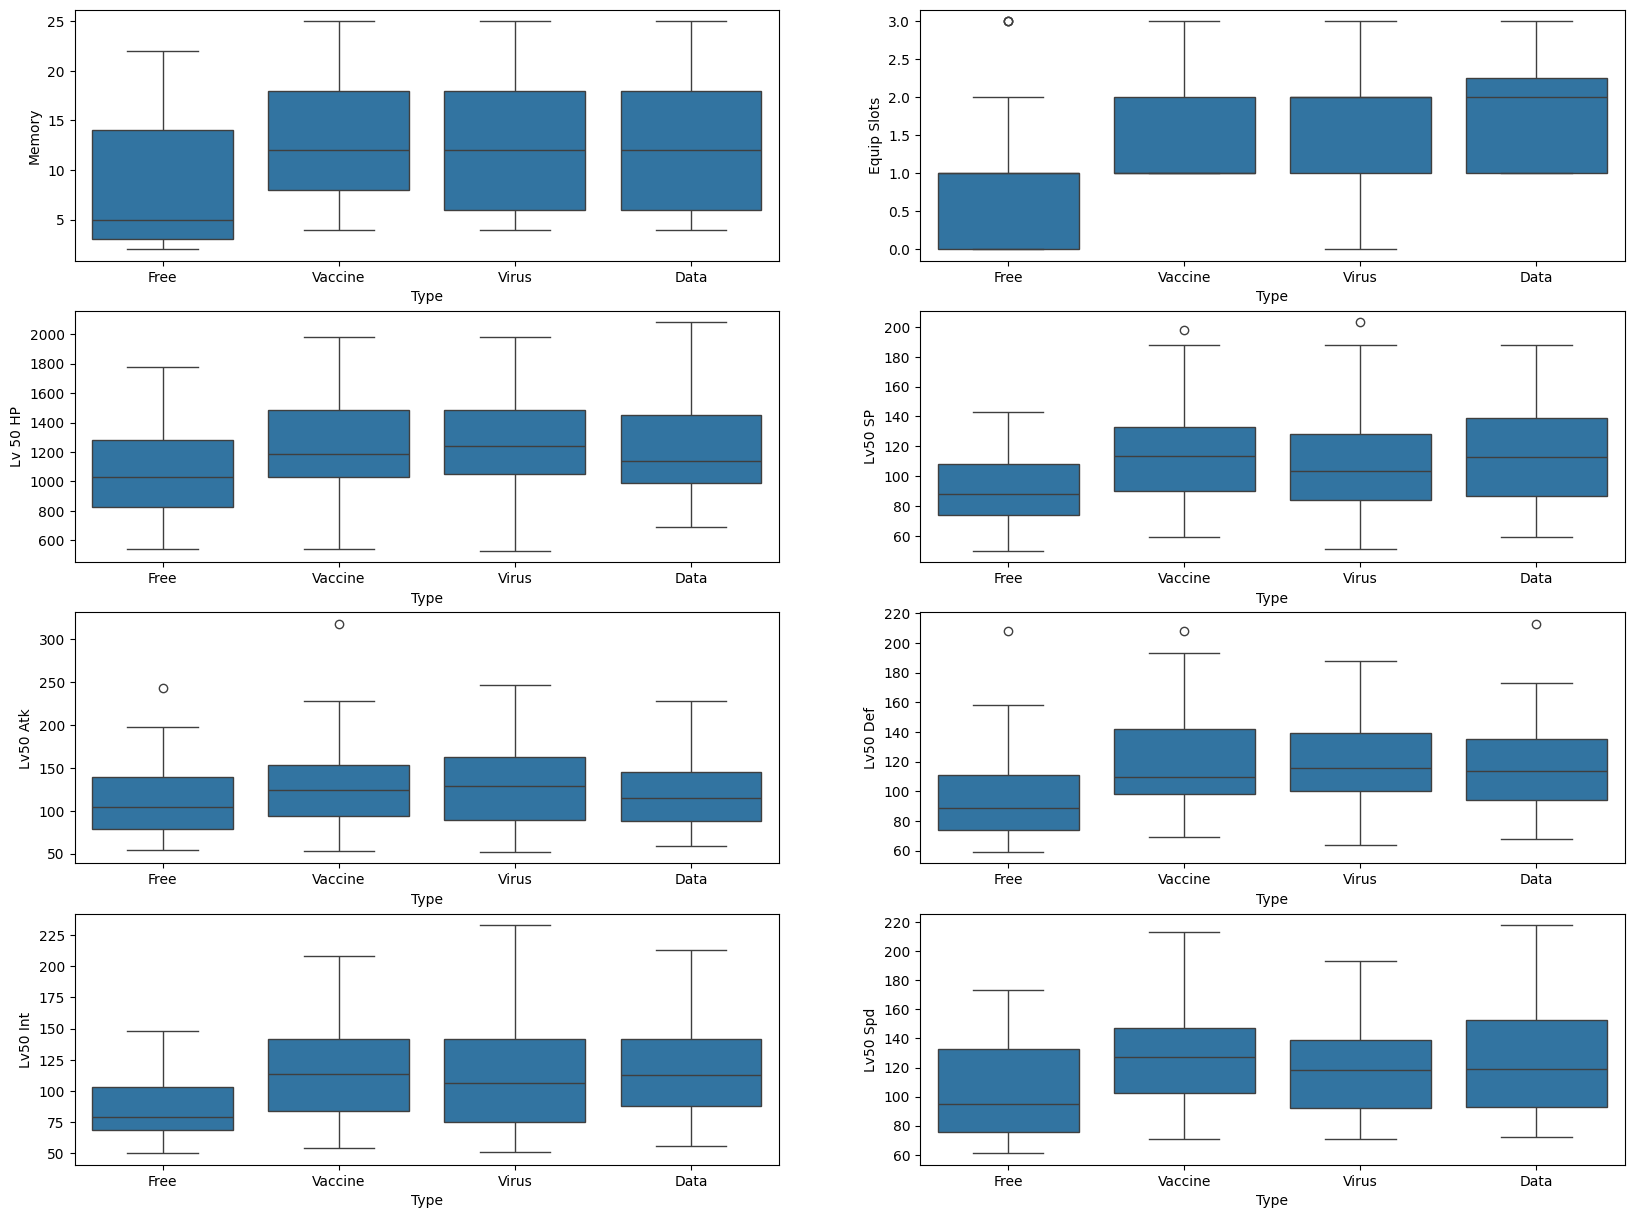

In [146]:
graficar_numericas(df, df.select_dtypes(exclude='object').columns.to_list(), TARGET)

## Convertir categóricas OHE

In [147]:
lista_cat = df.select_dtypes(include=['object']).columns.tolist()

In [148]:
lista_cat

['Digimon', 'Stage', 'Type', 'Attribute']

In [149]:
lista_cat.remove(TARGET)

In [150]:
lista_cat.remove('Digimon')

In [151]:
lista_cat

['Stage', 'Attribute']

In [152]:
dummieStage = pd.get_dummies(df['Stage'], prefix='Stage')

In [153]:
df = df.join(dummieStage, on='Number', how='inner')

In [154]:
dummieAttribute = pd.get_dummies(df['Attribute'], prefix='Att')

In [155]:
df = df.join(dummieAttribute, on='Number', how='inner')

In [156]:
df.sample()

,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,...,Stage_Ultra,Att_Dark,Att_Earth,Att_Electric,Att_Fire,Att_Light,Att_Neutral,Att_Plant,Att_Water,Att_Wind
Number,,,,,,,,,,,,,,,,,,,,,
149,MegaSeadramon,Ultimate,Data,Water,12,2,1330,138,86,114,...,False,False,False,False,False,False,False,False,True,False


In [157]:
col_borrar = ['Digimon', 'Stage', 'Attribute']

In [158]:
df.drop(col_borrar, axis=1, inplace=True)

In [159]:
df.sample()

,Type,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,Stage_Armor,...,Stage_Ultra,Att_Dark,Att_Earth,Att_Electric,Att_Fire,Att_Light,Att_Neutral,Att_Plant,Att_Water,Att_Wind
Number,,,,,,,,,,,,,,,,,,,,,
230,Virus,22,1,1240,153,144,139,144,193,False,...,False,True,False,False,False,False,False,False,False,False


In [160]:
lista_atributos = df.columns.tolist()

In [166]:
lista_atributos.remove(TARGET)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(df[lista_atributos], df[TARGET], train_size=0.15, random_state=42)

In [168]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

In [170]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
doc_data = export_graphviz (
    decision_tree=dt,
    feature_names=X_train.columns,
    rounded=True,
    proportion=True,
    precision=2,
    filled=True
)

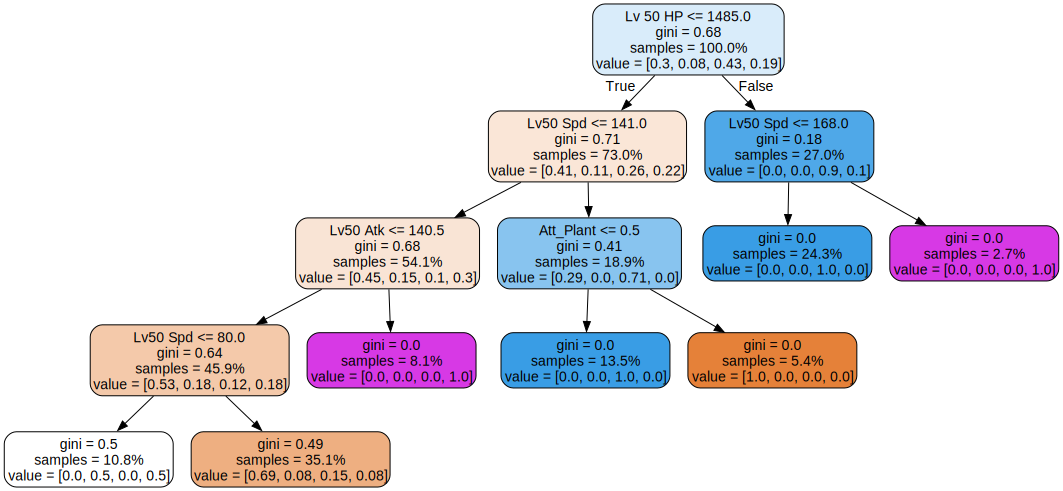

In [ ]:
graphviz.Source(doc_data)